### Cosmology starter notebook

Suggested Jupyter notebook to use to get started on the second assignment for Physical Cosmology

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#### Friedmann equation

We will integrate the Friedmann equation with matter and radiation:

$$ H^2(a) = H_0^2 (\Omega_{R,0} a^{-4} + \Omega_{M,0} a^{-3}) $$ 

Changing variable to the proper time in units of the inverse Hubble constant, $H_0t$, and rearranging we get
 
$$ \frac{da}{d(H_0t)} = a (\Omega_{R,0} a^{-4} + \Omega_{M,0} a^{-3})^{1/2} .$$

We will also integrate for the comoving time, $\tau$, which is related to the proper time.  
In units of the inverse Hubble constant we have

$$H_0\tau =  \int H_0 d\tau =  \int \frac{d (H_0t)}{a}.$$ 

#### Define the subroutine 

We integrate a two-dimensional vector, _y_, composed of the scale factor and the comoving time. The subroutine _pend_ takes the present value of the vector ($a$ and $H_0\tau$) and the independent variable ($H_0t$) and returns the time derivative of the vector.

In [8]:
def pend(y, t, O_R, O_M):
    ascale, tau = y
    hubble2 = O_R/ascale/ascale + O_M/ascale
    hubble = np.sqrt(hubble2)
    dydt = [hubble, 1./ascale]
    return dydt

Define the proper time in an array where we want to integrate the dependent variables.  
This will integrate from $t = 10^{-10} H_0^{-1}$ to $t = H_0^{-1}$ in 100 log steps. 

In [9]:
t = np.logspace(-10, 0, 100)

#### Initial conditions

We compute the initial conditions for a radiation+matter cosmology at an early time using known analytic solutions in the radiation-dominated era, for the scale factor:

$$ a = \Omega_{R,0}^{1/4} (2H_0t)^{1/2}.$$

and the comoving time:

$$ H_0 \tau = \Omega_{R,0}^{-1/2} a.$$

In [1]:
omegar = 0.00009
omegam = 0.99991
ascale_i = 1.414e-5*omegar**0.25
tau_i = 1.414e-5/omegar**0.25
y0 = [ascale_i, tau_i]

We next perform the integration with the _odeint_ subroutine, a package for integrating ordinary differential equations.  The inputs are the code that evaluates the derivatives (_pend_), the initial conditions for the variables, the independent variable and arguments for evaluating the derivatives. 

In [18]:
solrm = odeint(pend, y0, t, args=(omegar, omegam))

We instruct the notebook to display the plots inline. 

In [19]:
%matplotlib inline

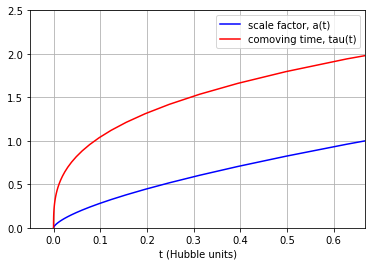

In [20]:
plt.plot(t, solrm[:, 0], 'b', label='scale factor, a(t)')
plt.plot(t, solrm[:, 1], 'r', label='comoving time, tau(t)')
plt.ylim(ymin=0., ymax=2.5)
plt.xlim(xmax=0.667)
plt.legend(loc='best')
plt.xlabel('t (Hubble units)')
plt.grid()
plt.show()